## Interpreting the Best Models

My modeling goal is to find the best houses for my clients, whose priority is having a private space. To achieve this, I will use my top two predictive models, one of which predicts house price generally, and one of which specifically includes privacy metrics. A house that is a 'fair' deal is one whose true value falls within one standard deviation of my prediction. A house that is a 'bad' deal is one whose true value is more than one standard deviation above my prediction. A house that is a 'good' or 'great' deal for my clients is one whose true value falls one or two standard deviations below my predictions, using both the general and the optimized privacy models. 

NOTE: These models are not 100% predictive. Just because a house is a 'good' or 'great' deal given the features we focused on, doesn't mean that it is the perfect match or has no outlying negative factors that are not accounted for. This model is a tool to help with decision-making, not replace it.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pickle

from sklearn.linear_model import LinearRegression

In [17]:
#read in the fit models
with open('../data/results.pickle', 'rb') as read_file:
    results = pickle.load(read_file)
    
sorted_results = sorted(results, key=lambda x: x[0])

In [18]:
#read in cleaned training data set. This is missing outliers, but in all cases those
#are not houses appropriate for my clients' needs anyway
houses = pd.read_csv('../data/cleaned_train.csv')

#create prediction columns
houses['base_pred'] = sorted_results[5][2].predict(houses[sorted_results[5][1]]).round()
houses['priv_pred'] = sorted_results[0][2].predict(houses[sorted_results[0][1]]).round()

#create residual columns
houses['base_resid'] = houses['saleprice'] - houses['base_pred']
houses['priv_resid'] = houses['saleprice'] - houses['priv_pred']

#find indexes of the various deal conditions
fair_index = houses[(houses['base_resid'] < houses['base_resid'].std()) | (houses['priv_resid'] < houses['priv_resid'].std())].index
good_index = houses[(houses['base_resid'] < (houses['base_resid'].std() * -2)) & (houses['priv_resid'] < (houses['priv_resid'].std() * -2))].index
great_index = houses[(houses['base_resid'] < (houses['base_resid'].std() * -3)) & (houses['priv_resid'] < (houses['priv_resid'].std() * -3))].index

#assign deal conditions
houses['deal'] = 'bad'
houses.loc[fair_index, 'deal'] = 'fair'
houses.loc[good_index, 'deal'] = 'good'
houses.loc[great_index, 'deal'] = 'great'

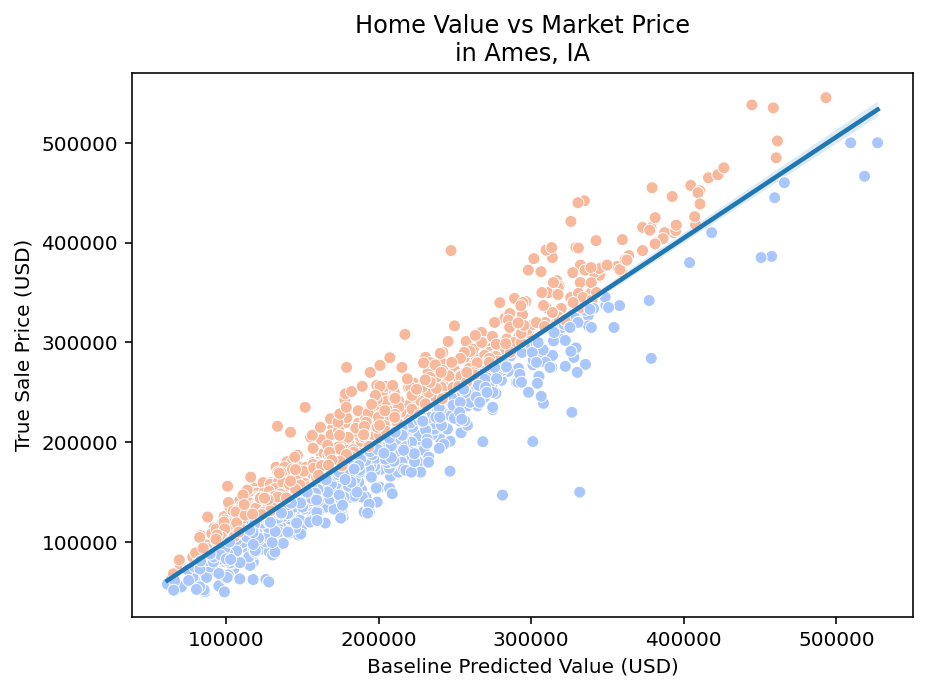

In [19]:
#an initial explanatory model
plt.figure(figsize=(7,5))
sns.regplot(x=houses['base_pred'],
            y=houses['saleprice'],
            scatter=False,
           )
sns.scatterplot(x=houses['base_pred'], 
                y=houses['saleprice'], 
                hue=houses['base_pred'] < houses['saleprice'], 
                legend=False,
                palette='coolwarm'        
)
    
plt.title('Home Value vs Market Price\nin Ames, IA')
plt.xlabel('Baseline Predicted Value (USD)')
plt.ylabel('True Sale Price (USD)')
plt.show()

For demonstration, to explain to the clients basic linear regression and the interpretation that if the predicted value is higher than the listed market value, the house is a good deal.

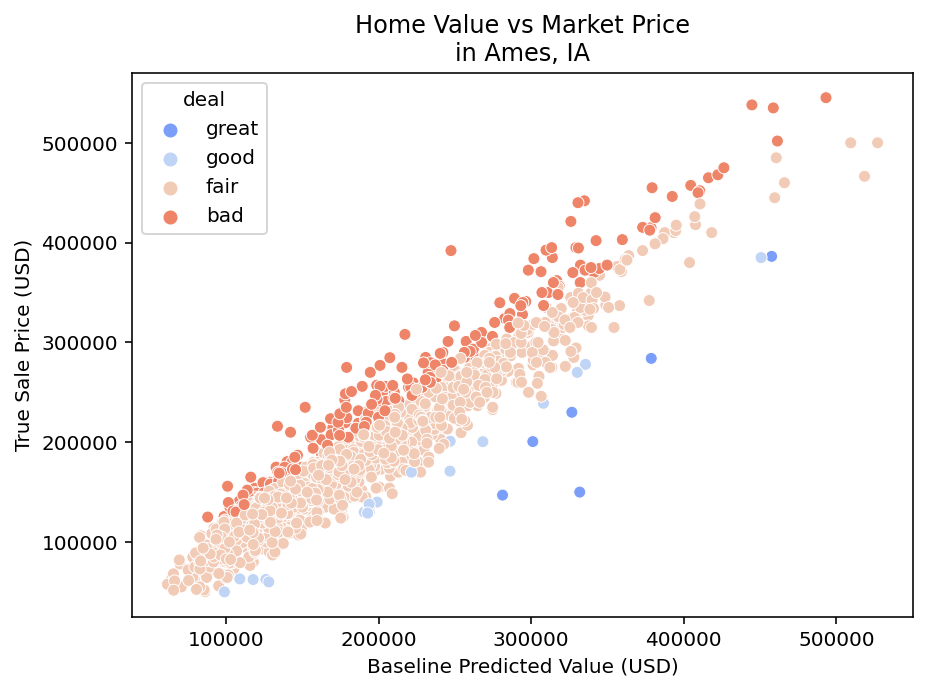

In [20]:
#a more specific visualization breaking out deal types
plt.figure(figsize=(7,5))
sns.scatterplot(x=houses['base_pred'], 
                y=houses['saleprice'], 
                hue=houses['deal'], 
                hue_order=['bad', 'fair', 'good', 'great'][::-1], 
                palette='coolwarm'        
)

plt.title('Home Value vs Market Price\nin Ames, IA')
plt.xlabel('Baseline Predicted Value (USD)')
plt.ylabel('True Sale Price (USD)')
plt.show()


Here we can see that a majority of houses have a fair market value, as expected. A good number are bad deals given our constraints, with prices above fair market value, and just a handful are good or great deals. This is actually great, as it gives my clients a much smaller pool to start from. 
One benefit to this type of modeling is that if we have the complete appraisal of the house, we can run it through the model and quickly determine how the market value sits compared to the client's specific needs. In addition, if the pool of 'good' and 'great' deals is exhausted, we can dig more deeply into the fair market pool and start to pull out more that are more highly rated for the client's specific needs.

To start off, the good and great deals are listed below. Happy house hunting!

In [21]:
best_deals = houses[houses['deal'].isin(['good', 'great'])][['pid', 'saleprice']]
best_deals.to_csv('../data/best-deals.csv', index=False)
best_deals

,pid,saleprice
30,527355150,278000
67,908188150,130000
124,533350090,150000
154,527182020,130000
160,903430070,62500
196,528166060,386250
219,527146135,270000
229,909275230,140000
315,906380100,239000
344,528431110,147000
